# RNN结果可视化

In [105]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import RNNnet as RNNnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = RNNnet().to('cuda')

def show_result(time = 0):
    

    # 加载预训练的参数
    checkpoint = torch.load('checkpoints/0.001.pth')

    # 将参数加载到模型中
    model.load_state_dict(checkpoint)
    
    X = data[5800:5830]
    X = np.expand_dims(X, axis=0)
    X_tensor = torch.Tensor(X).to('cuda')
    pre = model(X_tensor)
    prediction_array = pre.cpu().detach().numpy()
    prediction = prediction_array[:,time,:].reshape(-1)
    
    actual = data[5830:5860]
    actual = actual[time,:]  

    x = np.linspace(1, 100, 100) 
    actual = interp1d(x, actual, kind='cubic')
    prediction = interp1d(x,prediction, kind='cubic')
    x_dense = np.linspace(1, 100, 1000)

    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, actual(x_dense), '--', label='Actual')
    plt.plot(x_dense, prediction(x_dense), '-', label='Prediction')
    plt.legend()
    plt.title(f'time{time}')
    plt.xlabel('x (100 points)')
    plt.ylabel('Wave Height')
    plt.grid(True)
    plt.show()

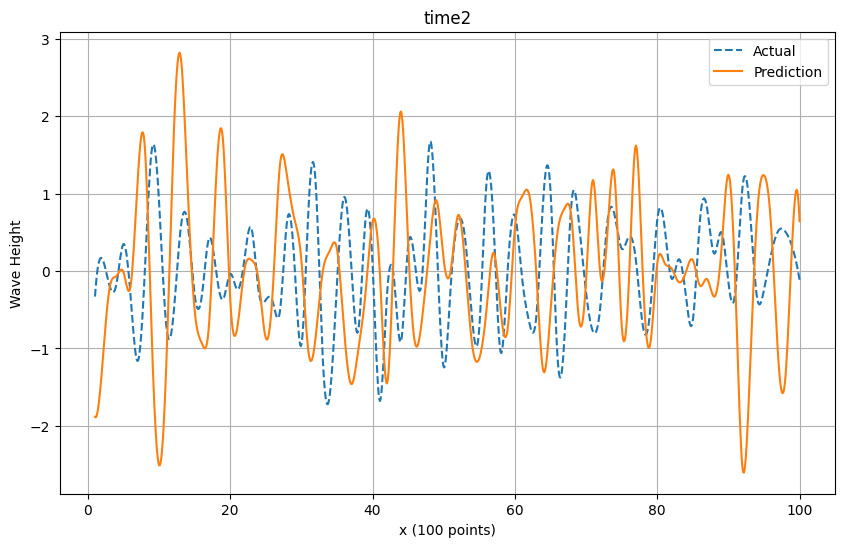

In [106]:
show_result(2)

## GRU结果可视化

In [44]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import GRUnet as GRUnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = GRUnet().to('cuda')

def show_result(time = 0):
    

    # 加载预训练的参数
    checkpoint = torch.load('checkpoints/GRUnet_model_parameters_0.001.pth')

    # 将参数加载到模型中
    model.load_state_dict(checkpoint)
    
    X = data[5800:5830]
    X = np.expand_dims(X, axis=0)
    X_tensor = torch.Tensor(X).to('cuda')
    pre = model(X_tensor)
    prediction_array = pre.cpu().detach().numpy()
    prediction = prediction_array[:,time,:].reshape(-1)
    
    actual = data[5830:5860]
    actual = actual[time,:]  

    x = np.linspace(1, 100, 100) 
    actual = interp1d(x, actual, kind='cubic')
    prediction = interp1d(x,prediction, kind='cubic')
    x_dense = np.linspace(1, 100, 1000)

    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, actual(x_dense), '--', label='Actual')
    plt.plot(x_dense, prediction(x_dense), '-', label='Prediction')
    plt.legend()
    plt.title(f'GRUnet predict the time of step {time}')
    plt.xlabel('100 points')
    plt.ylabel('Wave Height')
    plt.grid(True)
    plt.savefig('GRU_0.01_6.png')
    plt.show()
    

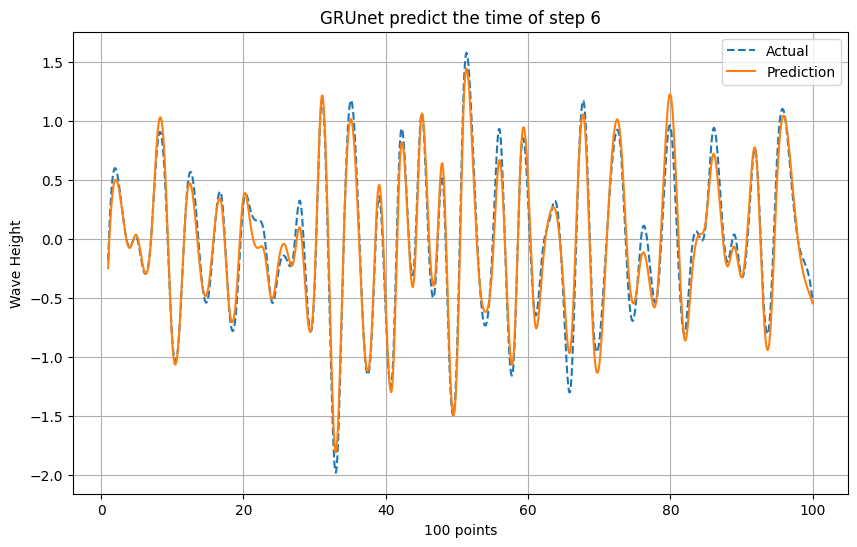

In [45]:
show_result(6)

## CNN 可视化

In [111]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import CNNnet as CNNnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = CNNnet().to('cuda')

def show_result(time = 0):
    

    # 加载预训练的参数
    checkpoint = torch.load('checkpoints/CNNnet_model_parameters_0.001.pth')

    # 将参数加载到模型中
    model.load_state_dict(checkpoint)
    
    X = data[5800:5830]
    X = np.expand_dims(X, axis=0)
    X_tensor = torch.Tensor(X).to('cuda').permute(0, 2, 1)
    pre = model(X_tensor)
    prediction_array = pre.cpu().detach().numpy()
    prediction = prediction_array[:,time,:].reshape(-1)
    
    actual = data[5830:5852]
    actual = actual[time,:]  

    x = np.linspace(1, 100, 100) 
    actual = interp1d(x, actual, kind='cubic')
    prediction = interp1d(x,prediction, kind='cubic')
    x_dense = np.linspace(1, 100, 1000)

    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, actual(x_dense), '--', label='Actual')
    plt.plot(x_dense, prediction(x_dense), '-', label='Prediction')
    plt.legend()
    plt.title(f'time{time}')
    plt.xlabel('x (100 points)')
    plt.ylabel('Wave Height')
    plt.grid(True)
    plt.show()
    

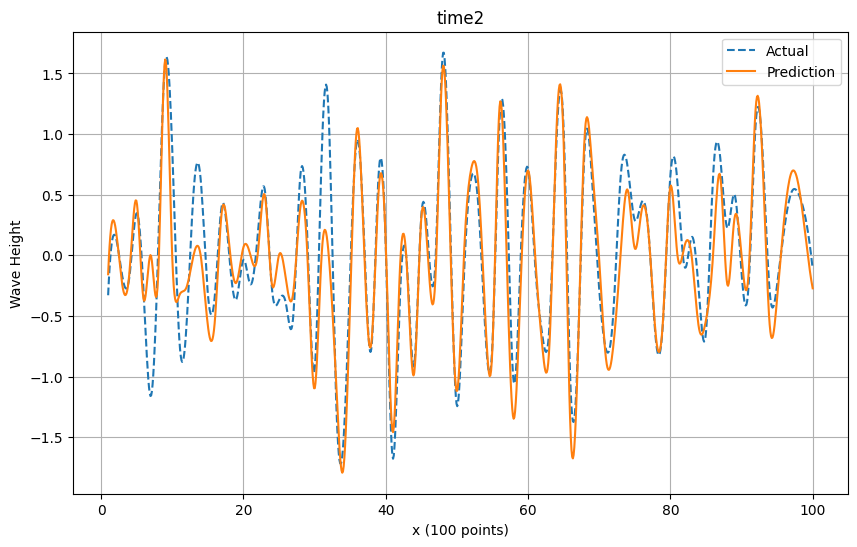

In [112]:
show_result(2)


## CRNN

In [107]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import CRNNnet as CRNNnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = CRNNnet().to('cuda')

def show_result(time = 0):
    

    # 加载预训练的参数
    checkpoint = torch.load('checkpoints/CRNNnet_model_parameters.pth')

    # 将参数加载到模型中
    model.load_state_dict(checkpoint)
    
    X = data[5900:5930]
    X = np.expand_dims(X, axis=0)
    X_tensor = torch.Tensor(X).to('cuda').permute(0,2,1)
    pre = model(X_tensor)
    prediction_array = pre.cpu().detach().numpy()
    prediction = prediction_array[:,time,:].reshape(-1)
    
    actual = data[5930:5960]
    actual = actual[time,:]  

    x = np.linspace(1, 100, 100) 
    actual = interp1d(x, actual, kind='cubic')
    prediction = interp1d(x,prediction, kind='cubic')
    x_dense = np.linspace(1, 100, 1000)

    plt.figure(figsize=(10, 6))
    plt.plot(x_dense, actual(x_dense), '--', label='Actual')
    plt.plot(x_dense, prediction(x_dense), '-', label='Prediction')
    plt.legend()
    plt.title(f'CRNNnet predict the time of step {time}')
    plt.xlabel('100 points')
    plt.ylabel('Wave Height')
    plt.grid(True)
    # plt.savefig('CRNN_0.01_1.png')
    plt.show()

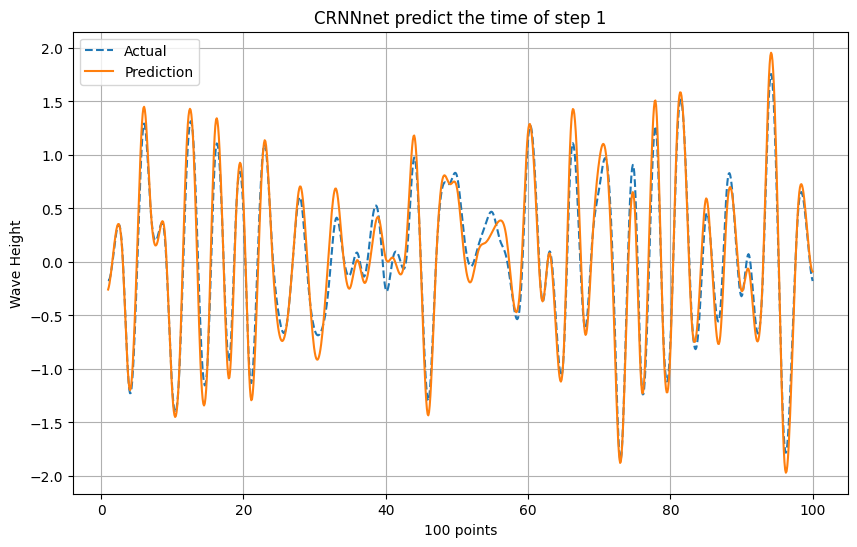

In [110]:
show_result(1)

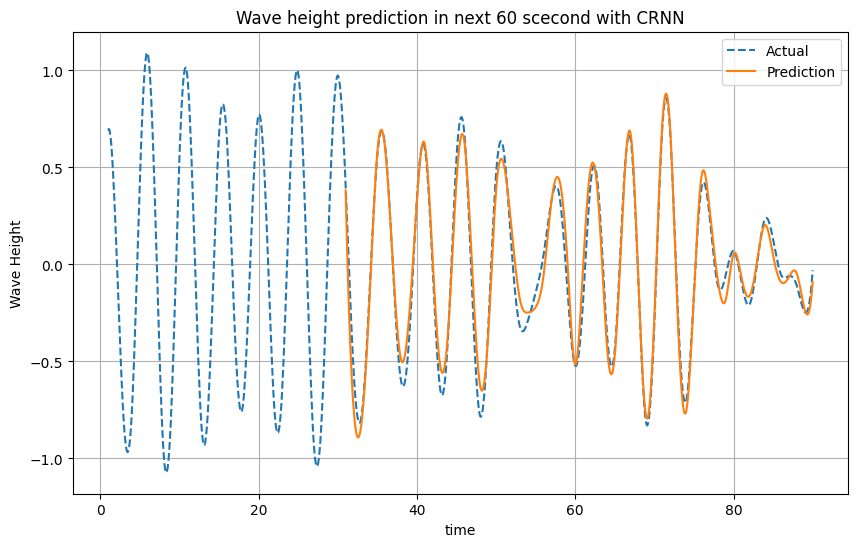

In [95]:

from scipy.interpolate import interp1d
import numpy as np
from models.crnn import CRNNnet as CRNNnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = CRNNnet().to('cuda')

# 加载预训练的参数
checkpoint = torch.load('checkpoints/CRNNnet_model_parameters.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda').permute(0,2,1)
pre_1 = model(X_tensor)
pre = pre_1.permute(0,2,1)
pre_2 = model(pre)


prediction_array_1 = pre_1.cpu().detach().numpy()
prediction_array_2 = pre_2.cpu().detach().numpy()


array1 = prediction_array_1[:,:,70]
array2 = prediction_array_2[:,:,70]


concatenated_array = np.concatenate((array1, array2), axis=1).reshape(-1)

# prediction = prediction_array[:,6,:].reshape(-1)

actual = data[5800:5890]
actual = actual[:,70]  

x_1 = np.linspace(1, 90, 90) 
x_2 = np.linspace(31, 90, 60) 

actual = interp1d(x_1, actual, kind='cubic')
prediction = interp1d(x_2,concatenated_array, kind='cubic')
x_dense_1 = np.linspace(1, 90, 900)
x_dense_2 = np.linspace(31, 90, 600)


plt.figure(figsize=(10, 6))
plt.plot(x_dense_1, actual(x_dense_1), '--', label='Actual')
plt.plot(x_dense_2, prediction(x_dense_2), '-', label='Prediction')
plt.legend()
plt.title('Wave height prediction in next 60 scecond with CRNN')
plt.xlabel('time')
plt.ylabel('Wave Height')
plt.grid(True)
plt.savefig('CRNN_NO70_60s.png')
plt.show()

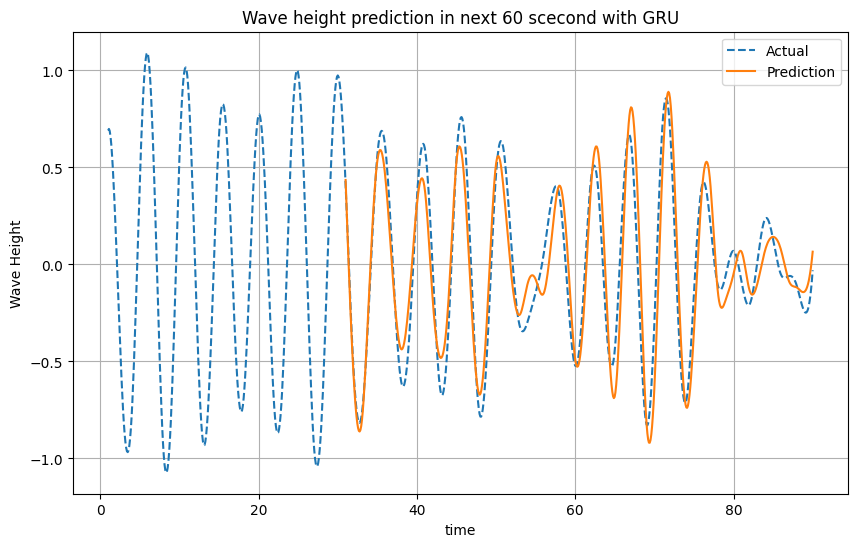

In [85]:
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
import numpy as np
from models.crnn import GRUnet as GRUnet
import torch


eta00 = np.load('data/6000_1s_data_eta00.npy')
data = eta00[:,20,100:200]
model = GRUnet().to('cuda')


    

# 加载预训练的参数
checkpoint = torch.load('checkpoints/GRUnet_model_parameters_0.001.pth')

# 将参数加载到模型中
model.load_state_dict(checkpoint)

X = data[5800:5830]
X = np.expand_dims(X, axis=0)
X_tensor = torch.Tensor(X).to('cuda')
pre_1 = model(X_tensor)
pre = pre_1
pre_2 = model(pre)


prediction_array_1 = pre_1.cpu().detach().numpy()
prediction_array_2 = pre_2.cpu().detach().numpy()


array1 = prediction_array_1[:,:,70]
array2 = prediction_array_2[:,:,70]


concatenated_array = np.concatenate((array1, array2), axis=1).reshape(-1)

# prediction = prediction_array[:,6,:].reshape(-1)

actual = data[5800:5890]
actual = actual[:,70]  

x_1 = np.linspace(1, 90, 90) 
x_2 = np.linspace(31, 90, 60) 

actual = interp1d(x_1, actual, kind='cubic')
prediction = interp1d(x_2,concatenated_array, kind='cubic')
x_dense_1 = np.linspace(1, 90, 900)
x_dense_2 = np.linspace(31, 90, 600)


plt.figure(figsize=(10, 6))
plt.plot(x_dense_1, actual(x_dense_1), '--', label='Actual')
plt.plot(x_dense_2, prediction(x_dense_2), '-', label='Prediction')
plt.legend()
plt.title('Wave height prediction in next 60 scecond with')
plt.xlabel('time')
plt.ylabel('Wave Height')
plt.grid(True)
plt.savefig('GRU_NO.70_60s.png')
plt.show()